<a href="https://colab.research.google.com/github/IshwaryaSriram/EfficentNet-ImageClassification/blob/main/DiabeticRetinopathyGrading/B0Models_normalimages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Dataset from Kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ishwaryasriram","key":"0c236b1d97bafa0285eca11f866a5a5a"}'}

In [ ]:
#setting up required directory to access kaggle dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 8.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=af02e842b3a604012d6d6ec808a9a9ec964ab5ff7d1a2e5bd3973bf080bd15dd
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
#downloading the datasaet (zipped file)
!kaggle datasets download -d sovitrath/diabetic-retinopathy-2015-data-colored-resized

100% 1.94G/1.94G [00:19<00:00, 33.5MB/s]
100% 1.94G/1.94G [00:19<00:00, 107MB/s] 


In [ ]:
#extracting data from zip file
import zipfile
zip_ref = zipfile.ZipFile('diabetic-retinopathy-2015-data-colored-resized.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
cd files

/content/files


In [ ]:
#importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
%load_ext tensorboard
import datetime, os
from tensorflow.keras import layers
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

Exploratory Data Analysis

In [ ]:
#displaying the first few rows from the dataset 
dataset_csv = pd.read_csv('trainLabels.csv')
print(dataset_csv.dtypes)
print(dataset_csv.describe())

image    object
level     int64
dtype: object
              level
count  35126.000000
mean       0.526049
std        0.970390
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000


In [ ]:
# cd '../content/files'
print(
    len(os.listdir('colored_images/colored_images/Mild')) +
    len(os.listdir('colored_images/colored_images/Moderate')) +
    len(os.listdir('colored_images/colored_images/No_DR')) +
    len(os.listdir('colored_images/colored_images/Proliferate_DR')) +
    len(os.listdir('colored_images/colored_images/Severe'))
)

35126


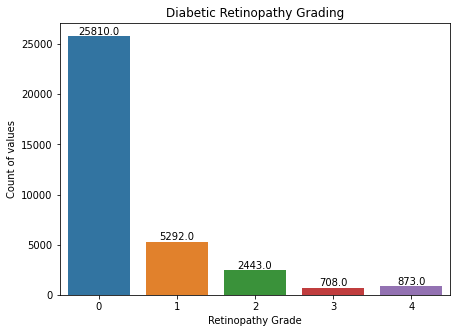

In [ ]:
#bar graph representing the dataset distribution
plt.figure(figsize=(7,5))
plt.title("Diabetic Retinopathy Grading")
data_plot = sns.barplot(x=dataset_csv.level.unique(), y=dataset_csv['level'].value_counts())
plt.ylabel("Count of values")
plt.xlabel("Retinopathy Grade")

for p in data_plot.patches:
    data_plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 4.5), 
                   textcoords = 'offset points')


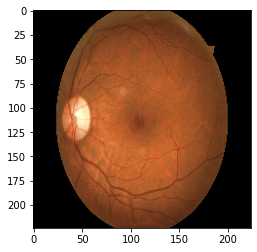

In [ ]:
#Plotting a sample image 

# import cv2 as cv
# from matplotlib import pyplot as plt

# from resizeimage import resizeimage

img = cv2.imread('colored_images/colored_images/Mild/10030_left.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [ ]:
image_normal = []

i = 0
for data in os.listdir('colored_images/colored_images/No_DR'):
        img_d = cv2.imread('colored_images/colored_images/No_DR/{}'.format(data))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2RGB )
        if img_d is not None:
            image_normal.append([img_d,0])
        i+=1
        if i>=10000:
          break

i = 0
for data in os.listdir('colored_images/colored_images/Mild'):
        img_d = cv2.imread('colored_images/colored_images/Mild/{}'.format(data))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2RGB)
        if img_d is not None:
            image_normal.append([img_d)
            laberl.append(1),1])
        i+=1
    
i = 0
for data in os.listdir('colored_images/colored_images/Moderate'):
        img_d = cv2.imread('colored_images/colored_images/Moderate/{}'.format(data))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2RGB)
        if img_d is not None:
            image_normal.append([img_d,1])
        i+=1

i = 0
for data in os.listdir('colored_images/colored_images/Proliferate_DR'):
        img_d = cv2.imread('colored_images/colored_images/Proliferate_DR/{}'.format(data))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2RGB)
        if img_d is not None:
            image_normal.append([img_d,1])
        i+=1

i = 0
for data in os.listdir('colored_images/colored_images/Severe'):
        img_d = cv2.imread('colored_images/colored_images/Severe/{}'.format(data))
        img_d = cv2.cvtColor(img_d, cv2.COLOR_BGR2RGB)
        if img_d is not None:
            image_normal.append([img_d,1])
        i+=1
        

In [ ]:
random.shuffle(image_normal)
X_img = []
Y_lab = []
for data in image_normal:
    X_img.append(data[0])
    Y_lab.append(data[1])

X_arr_img = np.array(X_img)

X_train, X_test, Y_train, Y_test = train_test_split(X_arr_img, Y_lab, test_size=0.3)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
image_normal = []
X_img = []
Y_lab = []

In [ ]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(13521, 224, 224, 3) (5795, 224, 224, 3)
(13521,) (5795,)


Model is implemented with two different sets of weights:
  1. ImageNet
  2. Noisy Student 

In [ ]:
#loading Nosiy student 
!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/noisystudent/noisy_student_efficientnet-b0.tar.gz
!tar -xf noisy_student_efficientnet-b0.tar.gz

!wget https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/python/keras/applications/efficientnet_weight_update_util.py
!python efficientnet_weight_update_util.py --model b0 --notop --ckpt noisy_student_efficientnet-b0/model.ckpt --o efficientnetb0_notop.h5

--2021-06-29 17:41:30--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/noisystudent/noisy_student_efficientnet-b0.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.217.13.240, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156406658 (149M) [application/x-tar]
Saving to: ‘noisy_student_efficientnet-b0.tar.gz’

noisy_student_effic 100%[===================>] 149.16M   249MB/s    in 0.6s    

2021-06-29 17:41:31 (249 MB/s) - ‘noisy_student_efficientnet-b0.tar.gz’ saved [156406658/156406658]

--2021-06-29 17:41:34--  https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/python/keras/applications/efficientnet_weight_update_util.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.g

In [ ]:
#importing EfficientNet Model
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
base_model_imgnet = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model_ns = EfficientNetB0(include_top=False, weights="efficientnetb0_notop.h5", input_shape=(224,224,3))

In [ ]:
base_model_imgnet.trainable = False

model_1 = tf.keras.Sequential([
    base_model_imgnet,
    # tf.keras.layers.BatchNormalization(name='batch_norm1'),
    # tf.keras.layers.Conv2D(20, 1, activation='relu', name='conv1'),
    # tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.GlobalAveragePooling2D(name='avg_pool'),
    tf.keras.layers.BatchNormalization(name='batch_norm2'),
    tf.keras.layers.Dropout(0.2, name="dropout2"),
    tf.keras.layers.Dense(1, activation='sigmoid',name = 'output') 
    # tf.keras.layers.Dense(5, activation='softmax', name='output')
], name="EfficientNetB0")

In [ ]:
base_model_ns.trainable = False

model_2 = tf.keras.Sequential([
    base_model_ns,
    # tf.keras.layers.BatchNormalization(name='batch_norm1'),
    # tf.keras.layers.Conv2D(20, 1, activation='relu', name='conv1'),
    # tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.GlobalAveragePooling2D(name='avg_pool'),
    tf.keras.layers.BatchNormalization(name='batch_norm2'),
    tf.keras.layers.Dropout(0.2, name="dropout2"),
    tf.keras.layers.Dense(1, activation='sigmoid',name = 'output') 
    # tf.keras.layers.Dense(5, activation='softmax', name='output')
], name="EfficientNetB0")

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_1.compile(optimizer = opt,loss='binary_crossentropy',metrics=['accuracy'])
model_1.summary()

Model: "EfficientNetB0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
avg_pool (GlobalAveragePooli (None, 1280)              0         
_________________________________________________________________
batch_norm2 (BatchNormalizat (None, 1280)              5120      
_________________________________________________________________
dropout2 (Dropout)           (None, 1280)              0         
_________________________________________________________________
output (Dense)               (None, 1)                 1281      
Total params: 4,055,972
Trainable params: 3,841
Non-trainable params: 4,052,131
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(optimizer = opt,loss='binary_crossentropy',metrics=['accuracy'])
model_2.summary()

Model: "EfficientNetB0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
avg_pool (GlobalAveragePooli (None, 1280)              0         
_________________________________________________________________
batch_norm2 (BatchNormalizat (None, 1280)              5120      
_________________________________________________________________
dropout2 (Dropout)           (None, 1280)              0         
_________________________________________________________________
output (Dense)               (None, 1)                 1281      
Total params: 4,055,972
Trainable params: 3,841
Non-trainable params: 4,052,131
_________________________________________________________________


In [ ]:
hist_1 = model_1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15,shuffle=True,verbose=1)

# batch_size = 50

# hist_1 = model_1.fit(datagen.flow(X_train, Y_train, batch_size=batch_size,
#                  seed = 27, shuffle = False), 
#                     epochs=25, # one forward/backward pass of training data
#                     steps_per_epoch=X_train.shape[0]//batch_size, # number of images comprising of one epoch
#                     validation_data=(X_test, Y_test), # data for validation,
#                     verbose =1
#                     )

# hist_1 = model_1.fit(datagen.flow(X_train, Y_train, batch_size=30),
#                 #  seed = 27, shuffle = True), 
#                     epochs=25, # one forward/backward pass of training data
#                     # steps_per_epoch=X_train.shape[0]//30, # number of images comprising of one epoch
#                     validation_data=(X_test, Y_test), # data for validation,
#                     verbose =2)

Epoch 1/15
423/423 [==============================] - 71s 87ms/step - loss: 0.7055 - accuracy: 0.6031 - val_loss: 0.6195 - val_accuracy: 0.6475
Epoch 2/15
423/423 [==============================] - 35s 83ms/step - loss: 0.6583 - accuracy: 0.6285 - val_loss: 0.6130 - val_accuracy: 0.6702
Epoch 3/15
423/423 [==============================] - 35s 83ms/step - loss: 0.6408 - accuracy: 0.6438 - val_loss: 0.6118 - val_accuracy: 0.6652
Epoch 4/15
423/423 [==============================] - 35s 84ms/step - loss: 0.6333 - accuracy: 0.6474 - val_loss: 0.6100 - val_accuracy: 0.6606
Epoch 5/15
423/423 [==============================] - 36s 84ms/step - loss: 0.6330 - accuracy: 0.6473 - val_loss: 0.6055 - val_accuracy: 0.6635
Epoch 6/15
423/423 [==============================] - 36s 85ms/step - loss: 0.6387 - accuracy: 0.6398 - val_loss: 0.6073 - val_accuracy: 0.6633
Epoch 7/15
423/423 [==============================] - 36s 85ms/step - loss: 0.6276 - accuracy: 0.6488 - val_loss: 0.6011 - val_accuracy:

In [ ]:
hist_2 = model_2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15,shuffle=True,verbose=1)

Epoch 1/15
423/423 [==============================] - 42s 88ms/step - loss: 0.7180 - accuracy: 0.5861 - val_loss: 0.6251 - val_accuracy: 0.6540
Epoch 2/15
423/423 [==============================] - 36s 85ms/step - loss: 0.6696 - accuracy: 0.6224 - val_loss: 0.6272 - val_accuracy: 0.6513
Epoch 3/15
423/423 [==============================] - 36s 85ms/step - loss: 0.6523 - accuracy: 0.6290 - val_loss: 0.6134 - val_accuracy: 0.6713
Epoch 4/15
423/423 [==============================] - 36s 85ms/step - loss: 0.6464 - accuracy: 0.6356 - val_loss: 0.6271 - val_accuracy: 0.6471
Epoch 5/15
423/423 [==============================] - 36s 85ms/step - loss: 0.6443 - accuracy: 0.6359 - val_loss: 0.6219 - val_accuracy: 0.6566
Epoch 6/15
423/423 [==============================] - 36s 85ms/step - loss: 0.6379 - accuracy: 0.6393 - val_loss: 0.6456 - val_accuracy: 0.6200
Epoch 7/15
423/423 [==============================] - 36s 85ms/step - loss: 0.6358 - accuracy: 0.6437 - val_loss: 0.6055 - val_accuracy:

In [ ]:
def plot_history(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

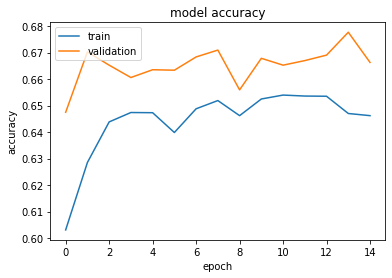

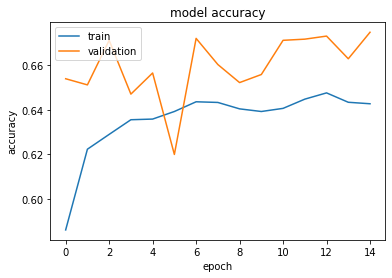

In [ ]:
plot_history(hist_1)
plot_history(hist_2)

In [ ]:
base_model_imgnet.trainable = False

model_3 = tf.keras.Sequential([
    base_model_ns,
    tf.keras.layers.BatchNormalization(name='batch_norm1'),
    tf.keras.layers.Conv2D(20, 1, activation='relu', name='conv1'),
    tf.keras.layers.Flatten(name='flatten'),
    # tf.keras.layers.GlobalAveragePooling2D(name='avg_pool'),
    tf.keras.layers.BatchNormalization(name='batch_norm2'),
    tf.keras.layers.Dropout(0.2, name="dropout2"),
    # tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='output')
    # tf.keras.layers.Conv2D(20, 1, activation='relu', name='conv1'),
    # tf.keras.layers.Flatten(name='flatten'),
    #
    # tf.keras.layers.BatchNormalization(name='batch_norm2'),
    # tf.keras.layers.Dense(512, activation='elu') ,
    # tf.keras.layers.Dropout(0.2, name="dropout2"),
    # tf.keras.layers.Dense(256, activation='elu'), 
    tf.keras.layers.Dense(1, activation='sigmoid',name = 'output') 
    # tf.keras.layers.Dense(5, activation='softmax', name='output')
], name="EfficientNetB0")

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_3.compile(optimizer = opt,loss='binary_crossentropy',metrics=['accuracy'])
model_3.summary()

Model: "EfficientNetB0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
batch_norm1 (BatchNormalizat (None, 7, 7, 1280)        5120      
_________________________________________________________________
conv1 (Conv2D)               (None, 7, 7, 20)          25620     
_________________________________________________________________
flatten (Flatten)            (None, 980)               0         
_________________________________________________________________
batch_norm2 (BatchNormalizat (None, 980)               3920      
_________________________________________________________________
dropout2 (Dropout)           (None, 980)               0         
_________________________________________________________________
output (Dense)               (None, 1)              

In [ ]:
hist_1 = model_3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15,shuffle=True,verbose=1)

Epoch 1/15
423/423 [==============================] - 44s 90ms/step - loss: 0.7432 - accuracy: 0.5763 - val_loss: 0.6487 - val_accuracy: 0.6357
Epoch 2/15
423/423 [==============================] - 37s 86ms/step - loss: 0.6595 - accuracy: 0.6247 - val_loss: 0.6324 - val_accuracy: 0.6516
Epoch 3/15
423/423 [==============================] - 36s 86ms/step - loss: 0.6326 - accuracy: 0.6481 - val_loss: 0.6160 - val_accuracy: 0.6668
Epoch 4/15
423/423 [==============================] - 37s 87ms/step - loss: 0.6183 - accuracy: 0.6582 - val_loss: 0.6318 - val_accuracy: 0.6616
Epoch 5/15
423/423 [==============================] - 47s 110ms/step - loss: 0.6120 - accuracy: 0.6631 - val_loss: 0.6486 - val_accuracy: 0.6535
Epoch 6/15
423/423 [==============================] - 37s 87ms/step - loss: 0.6027 - accuracy: 0.6773 - val_loss: 0.6189 - val_accuracy: 0.6601
Epoch 7/15
423/423 [==============================] - 36s 86ms/step - loss: 0.5942 - accuracy: 0.6794 - val_loss: 0.6146 - val_accuracy

In [ ]:
model_3.evaluate(X_test,Y_test)

182/182 [==============================] - 11s 60ms/step - loss: 0.6069 - accuracy: 0.6635


[0.6068838238716125, 0.6635029911994934]

In [ ]:
base_model_ns.trainable = False

model_4 = tf.keras.Sequential([
    base_model_ns,
    # tf.keras.layers.BatchNormalization(name='batch_norm1'),
    # tf.keras.layers.Conv2D(20, 1, activation='relu', name='conv1'),
    # tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.GlobalAveragePooling2D(name='avg_pool'),
    tf.keras.layers.BatchNormalization(name='batch_norm2'),
    tf.keras.layers.Dropout(0.2, name="dropout2"),
    tf.keras.layers.Dense(1, activation='sigmoid',name = 'output') 
    # tf.keras.layers.Dense(5, activation='softmax', name='output')
], name="EfficientNetB0")

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_4.compile(optimizer = opt,loss='binary_crossentropy',metrics=['accuracy'])
model_4.summary()

Model: "EfficientNetB0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
avg_pool (GlobalAveragePooli (None, 1280)              0         
_________________________________________________________________
batch_norm2 (BatchNormalizat (None, 1280)              5120      
_________________________________________________________________
dropout2 (Dropout)           (None, 1280)              0         
_________________________________________________________________
output (Dense)               (None, 1)                 1281      
Total params: 4,055,972
Trainable params: 3,841
Non-trainable params: 4,052,131
_________________________________________________________________


In [ ]:
hist_2 = model_4.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15,shuffle=True,verbose=1)

Epoch 1/15
423/423 [==============================] - 43s 89ms/step - loss: 0.7058 - accuracy: 0.5985 - val_loss: 0.6260 - val_accuracy: 0.6521
Epoch 2/15
423/423 [==============================] - 36s 86ms/step - loss: 0.6704 - accuracy: 0.6176 - val_loss: 0.6212 - val_accuracy: 0.6599
Epoch 3/15
423/423 [==============================] - 36s 86ms/step - loss: 0.6488 - accuracy: 0.6338 - val_loss: 0.6219 - val_accuracy: 0.6599
Epoch 4/15
423/423 [==============================] - 36s 85ms/step - loss: 0.6462 - accuracy: 0.6414 - val_loss: 0.6178 - val_accuracy: 0.6597
Epoch 5/15
423/423 [==============================] - 46s 110ms/step - loss: 0.6401 - accuracy: 0.6397 - val_loss: 0.6172 - val_accuracy: 0.6538
Epoch 6/15
423/423 [==============================] - 36s 86ms/step - loss: 0.6360 - accuracy: 0.6420 - val_loss: 0.6362 - val_accuracy: 0.6466
Epoch 7/15
423/423 [==============================] - 36s 85ms/step - loss: 0.6376 - accuracy: 0.6439 - val_loss: 0.6150 - val_accuracy

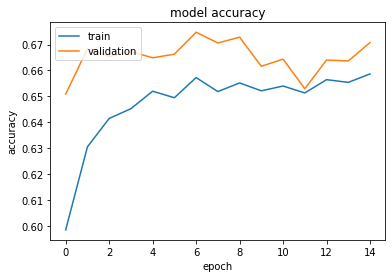

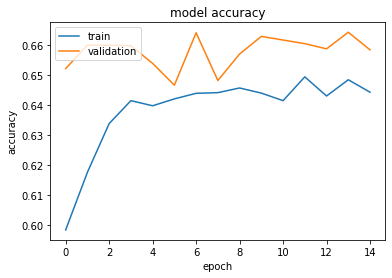

In [ ]:
plot_history(hist_1)
plot_history(hist_2)

In [ ]:
# from keras.callbacks import ReduceLROnPlateau
# lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)